# Homework 2: Language in the 2016 Presidential Election
Popular figures often have help managing their media presence.  In the 2016 election, Twitter was an important communication medium for every major candidate.  Many Twitter posts posted by the top two candidates were actually written by their aides.  You might wonder how this affected the content or language of the tweets.

In this assignment, we'll look at some of the patterns in tweets by the top two candidates, Clinton and Trump.  We'll start with Clinton.

Along the way, you'll get a first look at Pandas.  Pandas is a Python package that provides a `DataFrame` data structure similar to the `datascience` package's `Table`, which you might remember from Data 8.  `DataFrame`s are a bit harder to use than `Table`s, but they provide more advanced functionality and are a standard tool for data analysis in Python.

Some of the analysis in this assignment is based on a [post by David Robinson](http://varianceexplained.org/r/trump-tweets/).  Feel free to read the post, but do not copy from it!  David's post is written in the `R` programming language, which is a favorite of many data analysts, especially academic statisticians.  Once you're done with your analysis, you may find it interesting to see whether `R` is easier to use for this task.

To start the assignment, run the cell below to set up some imports and the automatic tests.

In [1]:
import math
import numpy as np
import matplotlib
import json
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

## Getting the dataset
Since we'll be looking at Twitter data, we need to download the data from Twitter!

Twitter provides an API for downloading tweet data in large batches.  The `tweepy` package makes it fairly easy to use.

#### Question 0
Install `tweepy`, if you don't already have it.  (Be sure to activate your Conda environment for the class first.  Then run `pip install tweepy`.)

There are instructions on using `tweepy` [here](http://tweepy.readthedocs.io/en/v3.5.0/getting_started.html), but we will give you example code.

Twitter requires you to have authentication keys to access their API.  To get your keys, you'll have to sign up as a Twitter developer.

#### Question 1
Follow these instructions to get your keys:

1. [Create a Twitter account](https://twitter.com).  You can use an existing account if you have one.
2. Under account settings, add your phone number to the account.
3. [Create a Twitter developer account](https://dev.twitter.com/resources/signup).  Attach it to your Twitter account.
4. Once you're logged into your developer account, [create an application for this assignment](https://apps.twitter.com/app/new).  You can call it whatever you want, and you can write any URL when it asks for a web site.
5. On the page for that application, find your Consumer Key and Consumer Secret.
6. On the same page, create an Access Token.  Record the resulting Access Token and Access Token Secret.
7. Edit the file [keys.json](keys.json) and replace the placeholders with your keys.  Don't turn in that file.

### I AM AN IMPORTANT NOTE.  DO NOT SKIP ME.
If someone has your authentication keys, they can access your Twitter account and post as you!  So don't give them to anyone, and **don't write them down in this notebook**.  The usual way to store sensitive information like this is to put it in a separate file and read it programmatically.  That way, you can share the rest of your code without sharing your keys.  That's why we're asking you to put your keys in `keys.json` for this assignment.

### I AM A SECOND IMPORTANT NOTE.
Twitter limits developers to a certain rate of requests for data.  If you make too many requests in a short period of time, you'll have to wait awhile (around 15 minutes) before you can make more.  So carefully follow the code examples you see and don't rerun cells without thinking.  Instead, always save the data you've collected to a file.  We've provided templates to help you do that.

In the example below, we have loaded some tweets by @BerkeleyData.  Run it, inspect the output, and read the code.


In [2]:
ds_tweets_save_path = "BerkeleyData_recent_tweets.pkl"
from pathlib import Path
# Guarding against attempts to download the data multiple times:
if not Path(ds_tweets_save_path).is_file():
    # Loading your keys from keys.json (which you should have filled
    # in in question 1):
    with open("keys.json") as f:
        keys = json.load(f)

    import tweepy

    # Authenticating:
    auth = tweepy.OAuthHandler(keys["consumer_key"], keys["consumer_secret"])
    auth.set_access_token(keys["access_token"], keys["access_token_secret"])
    api = tweepy.API(auth)

    # Getting as many recent tweets by @BerkeleyData as Twitter will let us have:
    example_tweets = list(tweepy.Cursor(api.user_timeline, id="BerkeleyData").items())

    # Saving the tweets to a file as "pickled" objects:
    with open(ds_tweets_save_path, "wb") as f:
        import pickle
        pickle.dump(example_tweets, f)

# Re-loading the results:
with open(ds_tweets_save_path, "rb") as f:
    import pickle
    example_tweets = pickle.load(f)

In [3]:
# Looking at one tweet object, which has type Status:
# example_tweets[0]
# ...to get a more easily-readable view.
import pprint
pprint.pprint(vars(example_tweets[0]))

{'_json': {'contributors': None,
           'coordinates': None,
           'created_at': 'Thu Aug 17 19:10:05 +0000 2017',
           'entities': {'hashtags': [{'indices': [100, 112],
                                      'text': 'datascience'}],
                        'symbols': [],
                        'urls': [{'display_url': 'bit.ly/2x4sZYt',
                                  'expanded_url': 'http://bit.ly/2x4sZYt',
                                  'indices': [76, 99],
                                  'url': 'https://t.co/bVS0PYjIEW'}],
                        'user_mentions': []},
           'favorite_count': 6,
           'favorited': False,
           'geo': None,
           'id': 898260660915535872,
           'id_str': '898260660915535872',
           'in_reply_to_screen_name': None,
           'in_reply_to_status_id': None,
           'in_reply_to_status_id_str': None,
           'in_reply_to_user_id': None,
           'in_reply_to_user_id_str': None,
           'is_qu

#### Question 2
Write code to download all the recent tweets by Hillary Clinton (@HillaryClinton).  Follow our example code if you wish.  Write your code in the form of four **functions** matching the documentation provided.  (You may define additional functions as helpers.)  **Once you've written your functions,** you can run the subsequent cell to download the tweets.

In [4]:
def load_keys(path):
    """Loads your Twitter authentication keys from a file on disk.
    
    Args:
        path (str): The path to your key file.  The file should
          be in JSON format and look like this (but filled in):
            {
                "consumer_key": "<your Consumer Key here>",
                "consumer_secret":  "<your Consumer Secret here>",
                "access_token": "<your Access Token here>",
                "access_token_secret": "<your Access Token Secret here>"
            }
    
    Returns:
        dict: A dictionary mapping key names (like "consumer_key") to
          key values."""
    ...
    with open(path) as f:
        keys = json.load(f)
    return keys

def download_recent_tweets_by_user(user_account_name, keys):
    """Downloads tweets by one Twitter user.

    Args:
        user_account_name (str): The name of the Twitter account
          whose tweets will be downloaded.
        keys (dict): A Python dictionary with Twitter authentication
          keys (strings), like this (but filled in):
            {
                "consumer_key": "<your Consumer Key here>",
                "consumer_secret":  "<your Consumer Secret here>",
                "access_token": "<your Access Token here>",
                "access_token_secret": "<your Access Token Secret here>"
            }

    Returns:
        list: A list of Status objects, each representing one tweet."""
    import tweepy
    # Authenticating:
    auth = tweepy.OAuthHandler(keys["consumer_key"], keys["consumer_secret"])
    auth.set_access_token(keys["access_token"], keys["access_token_secret"])
    api = tweepy.API(auth)
    # Get tweets from user_account_name
    tweets = list(tweepy.Cursor(api.user_timeline, id=user_account_name).items())
    return tweets

def save_tweets(tweets, path):
    """Saves a list of tweets to a file in the local filesystem.

    This function makes no guarantee about the format of the saved
    tweets, **except** that calling load_tweets(path) after
    save_tweets(tweets, path) will produce the same list of tweets
    and that only the file at the given path is used to store the
    tweets.  (That means you can implement this function however
    you want, as long as saving and loading works!)

    Args:
        tweets (list): A list of tweet objects (of type Status) to
          be saved.
        path (str): The place where the tweets will be saved.

    Returns:
        None"""
    ...
    with open(path, "wb") as f:
        import pickle
        pickle.dump(tweets, f)


def load_tweets(path):
    """Loads tweets that have previously been saved.

    Calling load_tweets(path) after save_tweets(tweets, path)
    will produce the same list of tweets.

    Args:
        path (str): The place where the tweets were be saved.

    Returns:
        list: A list of Status objects, each representing one tweet."""
    ...
    with open(path, "rb") as f:
        import pickle
        tweets = pickle.load(f)
        return tweets

In [5]:
# When you are done, run this cell to load @HillaryClinton's tweets.
# Note the function get_tweets_with_cache.  You may find it useful
# later.

def get_tweets_with_cache(user_account_name, keys_path):
    """Get recent tweets from one user, loading from a disk cache if available.
    
    The first time you call this function, it will download tweets by
    a user.  Subsequent calls will not re-download the tweets; instead
    they'll load the tweets from a save file in your local filesystem.
    All this is done using the functions you defined in the previous cell.
    This has benefits and drawbacks that often appear when you cache data:
    
    +: Using this function will prevent extraneous usage of the Twitter API.
    +: You will get your data much faster after the first time it's called.
    -: If you really want to re-download the tweets (say, to get newer ones,
       or because you screwed up something in the previous cell and your
       tweets aren't what you wanted), you'll have to find the save file
       (which will look like <something>_recent_tweets.pkl) and delete it.
    
    Args:
        user_account_name (str): The Twitter handle of a user, without the @.
        keys_path (str): The path to a JSON keys file in your filesystem.
    """
    save_path = "{}_recent_tweets.pkl".format(user_account_name)
    from pathlib import Path
    if not Path(save_path).is_file():
        keys = load_keys(keys_path)
        tweets = download_recent_tweets_by_user(user_account_name, keys)
        save_tweets(tweets, save_path)
    return load_tweets(save_path)

In [6]:
clinton_tweets = get_tweets_with_cache("HillaryClinton", "keys.json")

In [7]:
# If everything is working properly, this should print out
# a Status object (a single tweet).  clinton_tweets should
# contain around 3000 tweets.
def read_tweet(status_object):
    import pprint
    pprint.pprint(vars(status_object))

read_tweet(clinton_tweets[0])

{'_json': {'contributors': None,
           'coordinates': None,
           'created_at': 'Sun Aug 27 13:55:40 +0000 2017',
           'entities': {'hashtags': [],
                        'symbols': [],
                        'urls': [{'display_url': 'm.huffpost.com/us/entry/us_59…',
                                  'expanded_url': 'http://m.huffpost.com/us/entry/us_59a166dde4b0821444c37515',
                                  'indices': [91, 114],
                                  'url': 'https://t.co/RVReG1lRAd'}],
                        'user_mentions': []},
           'favorite_count': 62589,
           'favorited': False,
           'geo': None,
           'id': 901805416887275520,
           'id_str': '901805416887275520',
           'in_reply_to_screen_name': None,
           'in_reply_to_status_id': None,
           'in_reply_to_status_id_str': None,
           'in_reply_to_user_id': None,
           'in_reply_to_user_id_str': None,
           'is_quote_status': False,
      

In [8]:
from client.api.notebook import Notebook
ok = Notebook('hw2.ok')
_ = ok.grade('q02')

Assignment: Homework 2
OK, version v1.12.10

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



### Exploring the dataset
Twitter gives us a lot of information about each tweet, not just its text.  You can read the full documentation [here](https://dev.twitter.com/overview/api/tweets).  Look at one tweet to get a sense of the information we have available.

#### Question 3
Which fields contain:
1. the actual text of a tweet,
2. the time when the tweet was posted, and
3. the source (device and app) from which the tweet was posted?

To answer the question, write functions that extract each field from a tweet.  (Each one should take a single Status object as its argument.)

In [9]:
def extract_text(status_object):
    return vars(status_object)['text']

def extract_time(status_object):
    return vars(status_object)['created_at']

def extract_source(status_object):
    return vars(status_object)['source']

In [10]:
_ = ok.grade('q03')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



#### Question 4
Are there any other fields you think might be useful in identifying the true author of an @HillaryClinton tweet?  (If you're reading the documentation, consider whether fields are actually present often enough in the data to be useful.)

- `language`, obviously if the user tweets in a different language she/he often uses, she/he might use a translator or ask someone to tweet.
- `in_reply_to_screen_name`/`in_reply_to_status_id`/`in_reply_to_user_id`, to whom and what does the author reply may indicate if the author is true. Fake author may reply to more 'formal' tweets and use words more formally, real author may reply to 'personal' tweets and use words more personally.

## Building a Pandas table
JSON (and the Status object, which is just Tweepy's translation of the JSON produced by the Twitter API to a Python object) is nice for transmitting data, but it's not ideal for analysis.  The data will be easier to work with if we put them in a table.

To create an empty table in Pandas, write:

In [11]:
import pandas as pd
df = pd.DataFrame()

(`pd` is the standard abbrevation for Pandas.)

Now let's make a table with useful information in it.  To add a column to a DataFrame called `df`, write:
    
    df['column_name'] = some_list_or_array

([This page](http://pandas.pydata.org/pandas-docs/stable/10min.html) is a useful reference for many of the basic operations in Pandas.  You don't need to read it now, but it might be helpful if you get stuck.)

#### Question 5
Write a function called `make_dataframe`.  It should take as its argument a list of tweets like `clinton_tweets` and return a Pandas DataFrame.  The DataFrame should contain columns for all the fields in question 3 and any fields you listed in question 4.  **Use the field names as the names of the corresponding columns.**

In [133]:
def df_apply(df, i, col_name, f, tweet):
        """Apply f to col_name entry of the ith row of DataFrame.        
        """
        df.loc[i, col_name] = f(tweet[i])
        
def make_dataframe(tweets):
    """Make a DataFrame from a list of tweets, with a few relevant fields.
    
    Args:
        tweets (list): A list of tweets, each one a Status object.
    
    Returns:
        DataFrame: A Pandas DataFrame containing one row for each element
          of tweets and one column for each relevant field."""
    
    df = pd.DataFrame(index = range(len(clinton_tweets)), columns=['created_at', 'source', 'text'])    
    for i in range(len(clinton_tweets)):
        df_apply(df, i, 'source', extract_source, clinton_tweets)
        df_apply(df, i, 'created_at', extract_time, clinton_tweets)
        df_apply(df, i, 'text', extract_text, clinton_tweets)
    return df

In [13]:
clinton_df = make_dataframe(clinton_tweets)

In [41]:
# The next line causes Pandas to display all the characters
# from each tweet when the table is printed, for more
# convenient reading.  Comment it out if you don't want it.
pd.set_option('display.max_colwidth', 100)
clinton_df.head()

,created_at,source,text
0,2017-08-27 13:55:40,Twitter Web Client,"As we keep everyone affected by Hurricane Harvey in our thoughts, here’s how you can help:\nhttp..."
1,2017-08-24 15:08:28,Twitter for iPhone,Correct. https://t.co/AcOXbigpzi
2,2017-08-23 14:44:22,Twitter for iPhone,"RT @SimonBooks: “Writing ‘What Happened’ was hard, so is what we see every day. I hope this help..."
3,2017-08-21 11:42:15,Twitter for iPhone,Thinking of those who put their lives on the line to defend America. Let's keep these missing sa...
4,2017-08-17 21:41:17,Twitter for iPhone,"Barcelona, you have our resolve and support in the face of this cowardly attack. We stand togeth..."


In [15]:
_ = ok.grade('q05')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



## Tweetsourcing
Now that the preliminaries are done, we can do what we set out to do: Try to distinguish between Clinton's own tweets and her aides'.

#### Question 6
Create a plot showing how many tweets came from each kind of source.  For a real challenge, try using the Pandas documentation and Google to figure out how to do this.  Otherwise, hints are provided.

*Hint:* Start by grouping the data by source.  `df['source'].value_counts()` will create an object called a Series (which is like a table that contains exactly 2 columns, where one column is called the *index*).  You can create a version of that Series that's sorted by source (in this case, in alphabetical order) by calling `sort_index()` on it.

*Hint 2:* To generate a bar plot from a Series `s`, call `s.plot.barh()`.  You can also use `matplotlib`'s [`plt.barh`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.barh), but it's a little bit complicated to use.

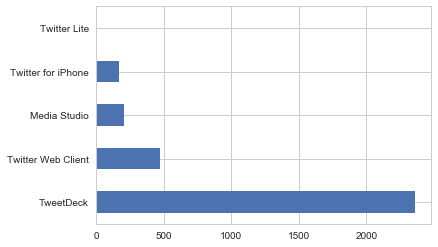

In [24]:
source_counts = clinton_df['source'].value_counts()
sns.set_style("whitegrid")
source_counts.plot.barh()

You should find that most tweets come from [TweetDeck](https://tweetdeck.twitter.com).

#### Question 7
Filter `clinton_df` to examine some tweets from TweetDeck and a few from the next-most-used platform.  From examining only a few tweets (say 10 from each category), can you tell whether Clinton's personal tweets are limited to one platform?

*Hint:* If `df` is a DataFrame and `filter_array` is an array of booleans of the same length, then `df[filter_array]` is a new DataFrame containing only the rows in `df` corresponding to `True` values in `filter_array`.

In [70]:
clinton_deck = clinton_df[clinton_df['source'] == 'TweetDeck']
clinton_deck.head()

,created_at,source,text
121,2016-11-09 18:55:10,TweetDeck,"Scripture tells us: Let us not grow weary in doing good, for in due season, we shall reap, if we..."
122,2016-11-09 16:53:19,TweetDeck,“Let us have faith in each other. Let us not grow weary. Let us not lose heart. For there are mo...
123,2016-11-09 16:53:02,TweetDeck,"“We are stronger together and will go forward together. And you should never, ever regret fighti..."
124,2016-11-09 16:52:19,TweetDeck,“I am grateful to our country for all it has given me. I count my blessings every day that I am ...
125,2016-11-09 16:51:59,TweetDeck,"""To all the little girls watching...never doubt that you are valuable and powerful &amp; deservi..."


In [71]:
clinton_client = clinton_df[(clinton_df['source'] == 'Twitter Web Client') | (clinton_df['source'] == 'Twitter for iPhone')]
clinton_client.head()

,created_at,source,text
0,2017-08-27 13:55:40,Twitter Web Client,"As we keep everyone affected by Hurricane Harvey in our thoughts, here’s how you can help:\nhttp..."
1,2017-08-24 15:08:28,Twitter for iPhone,Correct. https://t.co/AcOXbigpzi
2,2017-08-23 14:44:22,Twitter for iPhone,"RT @SimonBooks: “Writing ‘What Happened’ was hard, so is what we see every day. I hope this help..."
3,2017-08-21 11:42:15,Twitter for iPhone,Thinking of those who put their lives on the line to defend America. Let's keep these missing sa...
4,2017-08-17 21:41:17,Twitter for iPhone,"Barcelona, you have our resolve and support in the face of this cowardly attack. We stand togeth..."


In [58]:
# Conclusion

# According to the data, tweets from Twitter Deck are created 
# from 2016-07-23 to 2016-11-09, 
# while tweets from Twitter Web Client or Twitter for iPhone are created
# from 2016-07-23 to 2017-08-27. 

# This might imply that Clinton tweets by her self 
# using Twitter Web Client or iPhone client throughout her whole twitter period 
# and her aides tweets for her using Twitter Deck throughout her president compaign period.

## When in doubt, read...
Check Hillary Clinton's [Twitter page](http://twitter.com/HillaryClinton).  It mentions an easy way to identify tweets by the candidate herself.  All other tweets are by her aides.

#### Question 8
Write a function called `is_clinton` that takes a tweet (in JSON) as its argument and returns `True` for personal tweets by Clinton and `False` for tweets by her aides.  Use your function to create a column called `is_personal` in `clinton_df`.

*Hint:* You might find the string method `endswith` helpful.

In [135]:
def is_clinton(tweet):
    """Distinguishes between tweets by Clinton and tweets by her aides.
    
    Args:
        tweet (Status): One tweet.
    
    Returns:
        bool: True if the tweet is written by Clinton herself."""
    tweet_text = extract_text(tweet)
    return tweet_text.rfind('" —') == -1 and tweet_text.rfind('” —') == -1

for i in range(len(clinton_tweets)):
    df_apply(clinton_df, i, 'is_personal', is_clinton, clinton_tweets)

Now we have identified Clinton's personal tweets.  Let us return to our analysis of sources and see if there was any pattern we could have found.

You may recall that Tables from Data 8 have a method called `pivot`, which is useful for cross-classifying a dataset on two categorical attrbiutes.  DataFrames support a more complicated version of pivoting.  The cell below pivots `clinton_df` for you.

In [136]:
clinton_df[clinton_df['is_personal'] == True]

,created_at,source,text,is_personal
0,2017-08-27 13:55:40,Twitter Web Client,"As we keep everyone affected by Hurricane Harvey in our thoughts, here’s how you can help:\nhttp...",True
1,2017-08-24 15:08:28,Twitter for iPhone,Correct. https://t.co/AcOXbigpzi,True
2,2017-08-23 14:44:22,Twitter for iPhone,"RT @SimonBooks: “Writing ‘What Happened’ was hard, so is what we see every day. I hope this help...",True
3,2017-08-21 11:42:15,Twitter for iPhone,Thinking of those who put their lives on the line to defend America. Let's keep these missing sa...,True
4,2017-08-17 21:41:17,Twitter for iPhone,"Barcelona, you have our resolve and support in the face of this cowardly attack. We stand togeth...",True
5,2017-08-17 16:36:07,Twitter Web Client,"This is an important step, thanks to @ColorofChange for helping to make it happen. https://t.co/...",True
6,2017-08-13 01:20:28,Twitter Web Client,RT @TerryMcAuliffe: There's no place in Virginia for hatred &amp; bigotry. People who've come to...,True
7,2017-08-12 20:10:33,Twitter Lite,"We will not step backward. If this is not who we are as Americans, let's prove it.",True
8,2017-08-12 20:10:03,Twitter Lite,Now is the time for leaders to be strong in their words &amp; deliberate in their actions.,True
9,2017-08-12 20:09:38,Twitter Lite,"Every minute we allow this to persist through tacit encouragement or inaction is a disgrace, &am...",True


In [137]:
# This cell is filled in for you; just run it and examine the output.
def pivot_count(df, vertical_column, horizontal_column):
    """Cross-classifies df on two columns."""
    pivoted = pd.pivot_table(df[[vertical_column, horizontal_column]], index=[vertical_column], columns=[horizontal_column], aggfunc=len, fill_value=0)
    return pivoted.rename(columns={False: "False", True: "True"})

clinton_pivoted = pivot_count(clinton_df, 'source', 'is_personal')
clinton_pivoted

is_personal,False,True
source,,
Media Studio,40,167
TweetDeck,714,1645
Twitter Lite,0,5
Twitter Web Client,36,440
Twitter for iPhone,6,167


Do Clinton and her aides have different "signatures" of tweet sources?  That is, for each tweet they send, does Clinton send tweets from each source with roughly the same frequency as her aides?  It's a little hard to tell from the pivoted table alone.

#### Question 9
Create a visualization to facilitate that comparison.

*Hint:* `df.plot.barh` works for DataFrames, too.  But think about what data you want to plot.

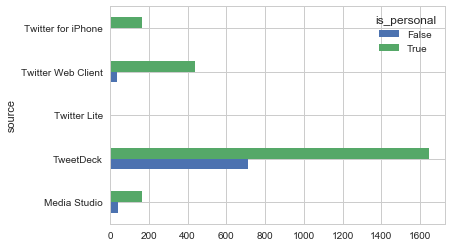

In [138]:
clinton_pivoted.plot.barh()

You should see that there are some differences, but they aren't large.  Do we need to worry that the differences (or lack thereof) are just "due to chance"?

Statistician Ani argues as follows:

> "The tweets we see are not a random sample from anything.  We have simply gathered every tweet by @HillaryClinton from the last several months.  It is therefore meaningless to compute, for example, a confidence interval for the rate at which Clinton used TweetDeck.  We have calculated exactly that rate from the data we have."

Statistician Belinda responds:

> "We are interested in whether Clinton and her aides *behave differently in general* with respect to Twitter client usage in a way that we could use to identify their tweets.  It's plausible to imagine that the tweets we see are a random sample from a huge unobserved population of all the tweets Clinton and her aides *might send*.  We must worry about error due to random chance when we draw conclusions about this population using only the data we have available."

#### Question 10
What position would you take on this question?  Choose a side and give one (brief) argument for it, or argue for some third position.

I agree with Ani that we have gathered all the tweets and needn't worry about the data we collected are random sample. By following Occam's Razor, it is important that we assume as little as possible while we can not testify there are "tweets Clinton and her aides might send".

#### Question 11
Assume you are convinced by Belinda's argument.  Perform a statistical test of the null hypothesis that the Clinton and aide tweets' sources are all independent samples from the same distribution (that is, that the differences we observe are "due to chance").  Briefly describe the test methodology and report your results.

*Hint:* If you need a refresher, [this section](https://www.inferentialthinking.com/chapters/16/1/two-categorical-distributions.html) of the Data 8 textbook from Fall 2016 covered this kind of hypothesis test.

*Hint 2:* Feel free to use `datascience.Table` to answer this question.  However, it will be advantageous to learn how to do it with `numpy` alone.  In our solution, we used some `numpy` functions you might not be aware of: `np.append`, `np.random.permutation`, `np.bincount`, and `np.count_nonzero`.  We have provided the function `expand_counts`, which should help you solve a tricky problem that will arise.

In [ ]:



def expand_counts(source_counts):
    """'Blow up' a list/array of counts of categories into an array of
    individuals matching the counts.  This is the inverse of np.bincount
    (with some technical caveats: only if the order of the individuals
    doesn't matter and each category has at least one count).
    
    For example, we can generate a list of two individuals of type 0,
    four of type 1, zero of type 2, and one of type 3 as follows:
    
    >>> expand_counts([2, 4, 0, 1])
    array([0, 0, 1, 1, 1, 1, 3])"""
    return np.repeat(np.arange(len(source_counts)), source_counts)

...

*Write your answer here, replacing this text.*

#### Question 12
Suppose you sample a random @HillaryClinton tweet and find that it is from the Twitter Web Client.  Your visualization in question 9 should show you that Clinton tweets from this source about twice as frequently as her aides do, so you might imagine it's reasonable to predict that the tweet is by Clinton.  But what is the probability that the tweet is by Clinton?  (You should find a relatively small number.  Clinton's aides tweet much more than she does.  So even though there is a difference in their tweet source usage, it would be difficult to classify tweets this way.)

*Hint:* Bayes' rule is covered in [this section](https://www.inferentialthinking.com/chapters/17/1/more-likely-than-not-binary-classifier.html) of the Data 8 textbook.

In [ ]:
probability_clinton = ...
probability_clinton

In [ ]:
_ = ok.grade('q12')

# Another candidate
Our results so far aren't Earth-shattering.  Clinton uses different Twitter clients at slightly different rates than her aides.

Now that we've categorized the tweets, we could of course investigate their contents.  A manual analysis (also known as "reading") might be interesting, but it is beyond the scope of this course.  And we'll have to wait a few more weeks before we can use a computer to help with such an analysis.

Instead, let's repeat our analysis for Donald Trump.

#### Question 13
Download the tweet data for Trump (@realDonaldTrump), and repeat the steps through question 6 to create a table called `trump_df`.

In [ ]:
trump_tweets = ...
trump_df = ...

In [ ]:
trump_df.head()

#### Question 14
Make a bar chart of the sources of Trump tweets.

In [ ]:
...

You should find two major sources of tweets.

It is reported (for example, in [this Gawker article](http://gawker.com/our-trump-twitter-bot-filters-out-donald-trumps-new-han-1783906386)) that Trump himself uses an Android phone (a Samsung Galaxy), while his aides use iPhones.  But Trump has not confirmed this.  Also, he has reportedly [switched phones](http://indiatoday.intoday.in/technology/story/which-phone-will-president-donald-trump-use-a-blackberry-that-cant-even-click-pics/1/862350.html) since his inauguration!  How might we verify whether this is a way to identify his tweets?

A retweet is a tweet that replies to (or simply repeats) a tweet by another user.  Twitter provides several mechanisms for this, as explained in [this article](https://blog.hubspot.com/blog/tabid/6307/bid/27675/How-to-Retweet-the-Right-Way-in-4-Easy-Steps.aspx#sm.00001bz3cbt3sqe1kyf4eavc4lj9a).  However, Trump has an unusual way of retweeting: He simply adds the original sender's name to the original message, puts everything in quotes, and then adds his own comments at the end.

For example, this is a tweet by user @melissa7889:

        @realDonaldTrump @JRACKER33 you should run for president!

Here is Trump's retweet of this, from 2013:

        "@melissa7889: @realDonaldTrump @JRACKER33 you should run for president!" Thanks,very nice!

Since 2015, the usual way of retweeting this message, and the method used by Trump's aides (but not Trump himself), would have been:

        Thanks,very nice! RT @melissa7889: @realDonaldTrump @JRACKER33 you should run for president!

#### Question 15
Write a function to identify Trump-style retweets, and another function to identify the aide-style retweets.  Then, use them to create a function called `tweet_type` that takes a tweet as its argument and returns values `"Trump retweet"`, `"Aide retweet"`, and `"Not a retweet"` as appropriate.  Use your function to add a `'tweet_type'` column to `trump_df`.

*Hint:* Try the string method `startswith` and the Python keyword `in`.

In [ ]:
def is_trump_style_retweet(tweet_text):
    """Returns True if tweet_text looks like a Trump-style retweet."""
    ...
    
def is_aide_style_retweet(tweet_text):
    """Returns True if tweet_text looks like an aide-style retweet."""
    ...

def tweet_type(tweet_text):
    """Returns "Trump retweet", "Aide retweet", or "Not a retweet"
    as appropriate."""
    ...

trump_df['tweet_type'] = ...

In [ ]:
trump_df

In [ ]:
_ = ok.grade('q15')

#### Question 16
Cross-classify @realDonaldTrump tweets by `source` and by `tweet_type` into a table called `trump_pivoted`.

*Hint:* We did something very similar after question 7.  You don't need to write much new code for this.

In [ ]:
trump_pivoted = ...
trump_pivoted

In [ ]:
_ = ok.grade('q16')

#### Question 17
Does the cross-classified table show evidence against the hypothesis that Trump and his advisors tweet from roughly the same sources?  Again assuming you agree with Statistician Belinda, run an hypothesis test in the next cell to verify that there is a difference in the relevant distributions.  Then use the subsequent cell to describe your methodology and results.  Are there any important caveats?

In [ ]:
...

*Write your answer here, replacing this text.*

We are really interested in knowing whether we can classify @realDonaldTrump tweets on the basis of the source.  Just knowing that there is a difference in source distributions isn't nearly enough.  Instead, we would like to claim something like this: "@realDonaldTrump tweets from Twitter for Android are generally authored by Trump himself.  Other tweets are generally authored by his aides."

#### Question 18
If you use bootstrap methods to compute a confidence interval for the proportion of Trump aide retweets from Android phones in "the population of all @realDonaldTrump retweets," you will find that the interval is [0, 0].  That's because there are no retweets from Android phones by Trump aides in our dataset.  Is it reasonable to conclude from this that Trump aides definitely never tweet from Android phones?

*Write your answer here, replacing this text.*

# Submitting your assignment
First, run the next cell to run all the tests at once.

In [ ]:
_ = ok.grade_all()

Now, run this code in your terminal to make a
[git commit](https://www.atlassian.com/git/tutorials/saving-changes/git-commit)
that saves a snapshot of your changes in `git`. The last line of the cell
runs [git push](http://stackoverflow.com/questions/2745076/what-are-the-differences-between-git-commit-and-git-push), which will send your work to your personal Github repo.

**Note:** Don't add and commit your `keys.json` file!  `git add -A` will do that, but the code we've written below won't.

    # Tell git to commit your changes to this notebook
    git add sp17/hw/hw2/hw2.ipynb
    
    # Tell git to make the commit
    git commit -m "hw2 finished"
    
    # Send your updates to your personal private repo
    git push origin master

Finally, we'll submit the assignment to OkPy so that the staff will know to grade it. You can submit as many times as you want, and you can choose which submission you want us to grade by going to https://okpy.org/cal/data100/sp17/.

Congratulations, you're done!

We've only scratched the surface of this dataset.  Twitter is a rich source of data about language and social interaction, and not only for political figures.  Now you know how to access it!